<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файлы-с-данными-и-объединим-их-в-один-датафрейм." data-toc-modified-id="Откроем-файлы-с-данными-и-объединим-их-в-один-датафрейм.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файлы с данными и объединим их в один датафрейм.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных" data-toc-modified-id="Проверка-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка типов данных</a></span></li><li><span><a href="#Изучение-и-обработка-пропусков-в-датафрейме" data-toc-modified-id="Изучение-и-обработка-пропусков-в-датафрейме-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение и обработка пропусков в датафрейме</a></span></li><li><span><a href="#Изучим-дубликаты-в-датафрейме" data-toc-modified-id="Изучим-дубликаты-в-датафрейме-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим дубликаты в датафрейме</a></span></li><li><span><a href="#Изучим-категориальные-значения" data-toc-modified-id="Изучим-категориальные-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучим категориальные значения</a></span></li><li><span><a href="#Проверим-количественные-значения" data-toc-modified-id="Проверим-количественные-значения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверим количественные значения</a></span></li><li><span><a href="#Добавим-новые-столбцы-с-информацией-о-годе-проката" data-toc-modified-id="Добавим-новые-столбцы-с-информацией-о-годе-проката-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавим новые столбцы с информацией о годе проката</a></span></li><li><span><a href="#Создадим-два-столбца:-с-именем-и-фамилией-главного-режиссёра-и-основным-жанром-фильма.-В-столбцы-войдут-первые-значения-из-списка-режиссёров-и-жанров-соответственно." data-toc-modified-id="Создадим-два-столбца:-с-именем-и-фамилией-главного-режиссёра-и-основным-жанром-фильма.-В-столбцы-войдут-первые-значения-из-списка-режиссёров-и-жанров-соответственно.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.</a></span></li><li><span><a href="#Проведем-исследовательский-анализ-данных" data-toc-modified-id="Проведем-исследовательский-анализ-данных-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Проведем исследовательский анализ данных</a></span></li><li><span><a href="#Исследуем-фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследуем-фильмы,-которые-получили-государственную-поддержку-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Исследуем фильмы, которые получили государственную поддержку</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. На насколько фильмы, которые снимаются с государственной поддержкой интересны зрителю.

# Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
 - title — название фильма;
 - puNumber — номер прокатного удостоверения;
 - show_start_date — дата премьеры фильма;
 - type — тип фильма;
 - film_studio — студия-производитель;
 - production_country — страна-производитель;
 - director — режиссёр;
 - producer — продюсер;
 - age_restriction — возрастная категория;
 - refundable_support — объём возвратных средств государственной поддержки;
 - nonrefundable_support — объём невозвратных средств государственной поддержки;
 - financing_source — источник государственного финансирования;
 - budget — общий бюджет фильма;
 - ratings — рейтинг фильма на КиноПоиске;
 - genres — жанр фильма.

Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

## Откроем файлы с данными и объединим их в один датафрейм. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_mov = pd.read_csv('/datasets/mkrf_movies.csv') #данные о прокатных удостоверениях.
data_mov.head()
data_mov[data_mov['puNumber'] == 'нет'] #фильм с некорректным заполнением данной строки, ее название получили из ошибки при попытке перевести в тип 'int'
data_mov = data_mov.loc[data_mov['puNumber'] != 'нет'] #удаляем эту строку
data_mov['puNumber'] = data_mov['puNumber'].astype('int') #приводим к типу 'int'
data_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
data_shows = pd.read_csv('/datasets/mkrf_shows.csv') #данные о прокате в российских кинотеатрах.
data_shows.head()
data_shows.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
data_full = data_mov.merge(data_shows, on = 'puNumber', how = 'left') #объединяем таблицы в одну
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [5]:
data_full.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


## Предобработка данных

### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [6]:
data_full['show_start_date'] = pd.to_datetime(data_full['show_start_date'], format = '%Y-%m-%d')
#приводим столбец 'show_start_date' к типу datetime

### Изучение и обработка пропусков в датафрейме

In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<AxesSubplot:>

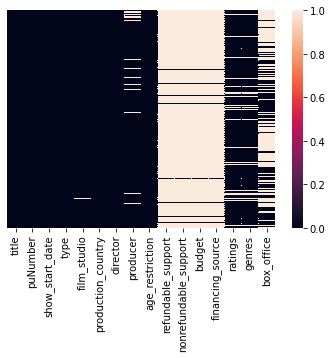

In [8]:
sns.heatmap(data_full.isna(), yticklabels = False, cbar = True) #смотрим общую картину пропусков

In [9]:
# другой вид отображение пропсков
data_full.isna().mean().sort_values(ascending = False).to_frame().style.background_gradient(cmap='Reds')

,0
refundable_support,0.955645
nonrefundable_support,0.955645
budget,0.955645
financing_source,0.955645
box_office,0.578090
genres,0.130261
ratings,0.129058
producer,0.075885
film_studio,0.002405
director,0.001202


In [10]:
data_full['film_studio'].isna().sum()

18

In [11]:
data_full['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                        341
ООО "Мульт в кино"                                                                                            57
Анимаккорд Лтд                                                                                                23
ООО "Мульт в кино"                                                                                            18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                        16
                                                                                                            ... 
ООО "Муви Про"                                                                                                 1
Гио Интертейнмент                                                                                              1
Еуропа Корпорейшн, Франс 3 Синема, Бибо Фильм, Вокинг зе Дог, юФильм                            

In [12]:
data_full[data_full['film_studio'].isna()]
len(data_full[data_full['film_studio'].isna()]) / len(data_full['film_studio']) 

data_full[(data_full['film_studio'].isna()) & (data_full['budget'] >= 0)] 


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Пропусков меньше 10%, какой-то взаимосвязи нет, оставим как есть. Пропущенные фильмы не финансировались из госбюджета.

In [13]:
data_full[data_full['production_country'].isna()]
data_full['production_country'] = data_full['production_country'].fillna('Россия')

Пропуски в production_country заменили на Россия

In [14]:
data_full[data_full['director'].isna()]
len(data_full[data_full['director'].isna()]) / len(data_full['director'])

0.0012024048096192384

Пропусков в director слишком мало (1%). Оставляем как есть.

In [15]:
len(data_full[data_full['producer'].isna()]) / len(data_full['producer'])

0.07588510354041417

Пропусков меньше 10%, какой-то взаимосвязи нет, оставим как есть.

Согласно заданию, столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.' Количество пропусков в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' совпадает, соответственно все пропуски оставляем без изменений.

In [16]:
data_full['refundable_support'].describe()
data_full['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

In [17]:
data_full['ratings'].unique()
data_full['ratings'] = pd.to_numeric(data_full['ratings'], errors = 'coerce')
len(data_full[data_full['ratings'].isna()]) / len(data_full['ratings'])

0.13293253173012692

In [18]:
data_full['ratings'].describe()

count    6490.000000
mean        6.479245
std         1.101665
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

In [19]:
data_full['ratings'] = data_full['ratings'].fillna(data_full['ratings'].median())

В ratings пропусков 13%. Значения mean и median очень близки, стандартное отклонение std = 1.1, это говорит о том, что данные равномерные. Меняем пропуски на median

In [20]:
len(data_full[data_full['genres'].isna()]) / len(data_full['genres'])

0.13026052104208416

In [21]:
data_full[data_full['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.6,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,219569.0
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.6,NaN,NaN


В genres пропусков 13%. Взаимосвязи в пропусках нет, оставляем как есть.

In [22]:
data_full[data_full['box_office'].isna()]
data_full['box_office'].describe()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

ВЫВОД.
Были обнаружены пропуски в следующих столбцах:
1. 'film_studio' - пропусков слишком мало (2%), и они не финансировались из госбюджета. Не будем тратить на них время, оставляем как есть.
2. 'production_country' - два пропуска из России. Заменили.
3. 'director' - пропусков слишком мало (1%). Оставляем как есть.
4. 'producer' - пропусков мало (7,5%). Оставляем как есть.
5. В задании указано: 'Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.' Количество пропусков в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' совпадает, соответственно все пропуски оставляем без изменений.
6. 'ratings' - были пропуски и значения в %. Данные привели к типу 'float', а значения в процентах перевели в NaN. Mean и median очень близки, стандартное отклонение std = 1.1, это говорит о том, что данные равномерные. Заменили пропуски на median.
7. 'genres' - пропусков 13%. Взаимосвязи в пропусках нет, оставляем как есть.
8. 'box_office' - пропусков много, оставили без изменений.

### Изучим дубликаты в датафрейме


In [23]:
data_full.duplicated().sum()

0

Явных дублей нет.

In [24]:
data_full['title'].duplicated().sum()

714

В столюце наименование (title) есть 714 дубликатов.

In [25]:
data_full[data_full['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [26]:
data_full[data_full['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [27]:
data_full['puNumber'].duplicated().sum()

2

In [28]:
data_full[data_full['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [29]:
data_full[data_full['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [30]:
data_full[data_full['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


В puNumber в двух случаях на два разных фильма дали одно прокатное удостоверение, это не дубликат.

ВЫВОД:
Явных дублей нет. 
Есть 714 дубликатов в названиях фильмов и два дубля в прокатных удостоверениях. Но это нельзя назвать дубликатами. Получается одни и теже фильмы выходили несколько раз в прокат, так как прокатные удостоверения разные. И в двух случаях на два разных фильма было выдано одно прокатное удостоверение. Такое бывает.

### Изучим категориальные значения

In [31]:
display(data_full['puNumber'].describe())
display(data_full[data_full['puNumber'] < 100000000])
data_full = data_full.loc[data_full['puNumber'] > 100000000]

count    7.485000e+03
mean     1.351966e+08
std      3.835292e+07
min      1.811096e+06
25%      1.120251e+08
50%      1.210155e+08
75%      1.240033e+08
max      2.310011e+08
Name: puNumber, dtype: float64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4700,1001 рецепт влюбленного кулинара,1811096,2010-12-23 12:00:00+00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


В столбце прокатных удостоверений (puNumber) есть нетепичное значение 1811096, избавимся от него.

In [32]:
display(data_full['type'].unique()) # у значений 'Художественный' и 'Анимационный' лишние пробелы
data_full['type'] = data_full['type'].str.strip() # удаляем лишние пробелы
display(data_full['type'].unique())

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [34]:
display(data_full['production_country'].unique()) 
data_full['production_country'] = data_full['production_country'].str.strip() 
display(data_full['production_country'].value_counts())

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

США                                       2175
Россия                                    1822
СССР                                       377
Франция                                    302
Великобритания                             259
                                          ... 
Россия - Германия - Украина                  1
Швеция - Германия - Франция - Норвегия       1
США - Великобритания- Франция - Швеция       1
Россия, Грузия, Хорватия, Испания            1
США - КНР - Индия - Ю.Корея                  1
Name: production_country, Length: 933, dtype: int64

Названия стран-производителей, где несколько стран, приведены не единообразно. Где-то страны перечисляются через "," (с пробелами и без), где через "-" (с пробелами и без). Мы удалили пробелы в пределах ковычек.

In [36]:
data_full['director'].unique()
data_full['director'].value_counts() 

О.Семёнова                                                                 47
Стивен Содерберг                                                           17
Д.Червяцов                                                                 17
Ридли Скотт                                                                16
Тиль Швайгер                                                               14
                                                                           ..
М.Агранович                                                                 1
С.Андрианова, А.Чижикова (псевдоним А.Воронина), П.Кутукина, К.Голубков     1
Джон Красинский                                                             1
Н.Карачкова                                                                 1
Саверио Костанцо                                                            1
Name: director, Length: 4811, dtype: int64

Имена зарубежных режиссеров могут писаться по-разному, например: ХЭрольд Рэмис и Гарольд Реймис. Явно это один и тот же человек. Нет смысла копаться в этих данных, потому что они не влияют на результат задачи.

In [38]:
data_full['producer'].unique()
data_full['producer'].value_counts()

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
А.Тельнов                                        11
                                                 ..
Лиза Хансен, Пол Херцберг                         1
Дебора Андерсон, Трина Венит, Кристофер Галло     1
Витторио Чекки Гори, Марио Чекки Гори             1
Саша Барон Коэн, Алек Берг, Дэвид Мэндел          1
Тьяго Мескита, Росс Оттерман, Джон Янг            1
Name: producer, Length: 5349, dtype: int64

In [39]:
display(data_full['film_studio'].unique())
display(data_full['film_studio'].value_counts()) 
data_full['film_studio'] = data_full['film_studio'].str.strip() 

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

Киностудия "Мосфильм"                                                                                        341
ООО "Мульт в кино"                                                                                            57
Анимаккорд Лтд                                                                                                23
ООО "Мульт в кино"                                                                                            18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                        16
                                                                                                            ... 
Гио Интертейнмент                                                                                              1
Еуропа Корпорейшн, Франс 3 Синема, Бибо Фильм, Вокинг зе Дог, юФильм                                           1
Эс Ис Продакшн, Тоник Продакшнз, Уолден Медиа, Вайнштейн Компани                                

Из-за лишних пробелов некоторые значения дублируются, например 'ООО "Мульт в кино" ' и  'ООО "Мульт в кино"'. Удалили лишние пробелы.

In [40]:
data_full['age_restriction'].unique()
data_full['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     810
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [41]:
data_full['genres'].unique()
data_full['genres'].value_counts()

драма                           476
комедия                         352
мелодрама,комедия               221
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
спорт,мелодрама,криминал          1
фантастика,боевик,ужасы           1
приключения,фантастика,драма      1
приключения,фэнтези,семейный      1
комедия,драма,семейный            1
Name: genres, Length: 742, dtype: int64

ВЫВОД
1. Во многих категориальных значениях встречаются недочеты в виде лишних пробелов. Удалили пробелы в столбцах - 'type', 'production_country' и 'film_studio'.
2. В 'puNumber' есть нетепичное значение 1811096, строку с этим значением удалили.
2. В 'production_country', названия стран-производителей, где несколько стран, приведены не единообразно. Где-то страны перечисляются через "," (с пробелами и без), где через "-" (с пробелами и без). Что с этим делать не понятно.
3. В столбцах 'producer' и 'director' велика вероятность дублей из-за разного написания инстранных имен в русской транскрипции. например: ХЭрольд Рэмис и Гарольд Реймис. Явно это один и тот же человек. 
4. В 'genres' слишком много вариаций, при желании можно провести какую-нибудь унификацию.

### Проверим количественные значения

In [42]:
data_full.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [48]:
data_full.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.484000e+03,3.320000e+02,3.320000e+02,3.320000e+02,7484.000000,3.158000e+03
mean,1.352144e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.495270,7.647870e+07
std,3.832447e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.026706,2.403531e+08
min,1.110001e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120252e+08,0.000000e+00,2.500000e+07,4.200000e+07,6.000000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.100000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


In [49]:
data_full['refundable_support'].corr(data_full['nonrefundable_support'])

0.35962164732637264

In [50]:
data_full['refundable_support'].corr(data_full['budget'])

0.6412236551080055

In [51]:
data_full['nonrefundable_support'].corr(data_full['budget'])

0.5941693326605133

In [52]:
data_full[data_full['budget'] == 0] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Фильмов с нулевым бюджетом - 17. Если бюджет равен 0, а возвратные и не возвратные средства не равны 0, то так не должно быть.

In [54]:
#выделим данные с бюджетом больше 0 и зададим ограничения для включения данных межквартильного размаха, 
#что бы исключить редкие случаи
data_budget = data_full.loc[(data_full['budget'] >= 42000000) & (data_full['budget'] <= 141000000)] 

In [55]:
#в полученный датафрейм добавим столбец, который показывает отношение бюджета к сумме возвратных и невозвратных средств
data_budget['ratio'] = data_budget['budget'] / (data_budget['nonrefundable_support'] + data_budget['refundable_support'])
data_budget['ratio'].describe()
#возьмем медианное значение столбца 'ratio' 
#это будет некий коэффициент, умножив на который сумму возвратных и невозвратных средств получим предполагаемый бюджет 
ratio = data_budget['ratio'].median()

In [56]:
#возьмем 'ratio' и умножим на сумму (data_full['nonrefundable_support'] + data_full['refundable_support']), 
#там где бюджет равен 0
data_full.loc[data_full['budget'] == 0, 'budget'] = (data_full['nonrefundable_support'] + data_full['refundable_support'])*ratio
data_full['budget'].describe()

count    3.320000e+02
mean     1.349937e+08
std      1.881435e+08
min      1.111079e+07
25%      4.615397e+07
50%      7.495500e+07
75%      1.500021e+08
max      2.305074e+09
Name: budget, dtype: float64

In [56]:
data_full['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [58]:
display(data_full[data_full['box_office'] == 0].count())
data_full[data_full['box_office'] == 0]

title                    24
puNumber                 24
show_start_date          24
type                     24
film_studio              24
production_country       24
director                 24
producer                 20
age_restriction          24
refundable_support        0
nonrefundable_support     0
budget                    0
financing_source          0
ratings                  24
genres                   20
box_office               24
dtype: int64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,драма,0.0


24 фильма с нулевыми сборами и все эти фильмы без господдержки.

ВЫВОДЫ:
1. Есть фильмы с нулевым бюджетом их 17 штук. При этом заполнены столбцы возвратные и не возвратные средства. Вероятнее всего, то что в бюджете 0 это ошибка. В результате анализа данных в столбцах - 'refundable_support', 'nonrefundable_support' и 'budget' обнаружена некая взаимосвязь. Бюджет в среднем, примерно в 2 раза больше суммы возвратных и невозвратных средств государственной поддержки. Решено заменить нулевые значения на сумму возвратных и невозвратных средств помноженую на коэффициент (определенный в результате исследования).
2. Имеются фильмы с нулевыми сборами, но рейтинги некоторых фильмов выше среднего. Вероятно это бесплатные показы, старых и каких-то экзотических фильмов.

###  Добавим новые столбцы с информацией о годе проката





In [59]:
data_full['year_show'] = data_full['show_start_date'].dt.year
data_full.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


### Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [60]:
def new_column(data):
    return str(data).split(",")[0]
data_full['general_director'] = data_full['director'].apply(new_column)
data_full['genre'] = data_full['genres'].apply(new_column)
data_full.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,general_director,genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
#выделяем данные с бюджетом больше 0
data_ratio = data_full.loc[data_full['budget'] >0]
#создаем столбец, показывающий долю участия государства в финансировании фильма
data_ratio['support_ratio'] = (data_ratio['refundable_support'] + data_ratio['nonrefundable_support']) / data_ratio['budget']
data_ratio['support_ratio'].describe()

count    332.000000
mean       0.518545
std        0.165694
min        0.044043
25%        0.384615
50%        0.562522
75%        0.654613
max        0.784745
Name: support_ratio, dtype: float64

array([[<AxesSubplot:title={'center':'support_ratio'}>]], dtype=object)

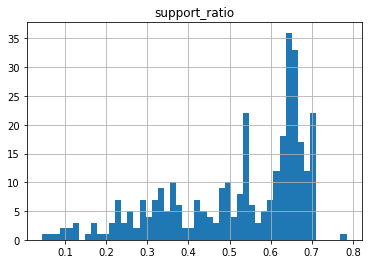

In [62]:
data_ratio.hist('support_ratio', bins = 50)

<AxesSubplot:xlabel='budget', ylabel='support_ratio'>

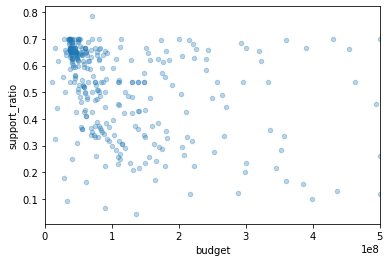

In [63]:
data_ratio.plot(x = 'budget', y = 'support_ratio', kind = 'scatter', xlim = (0, 500000000), alpha = 0.3)

ВЫВОД: 
В большинстве случаев государственная поддержка составляет от 50 до 70%. Основная часть фильмов с бюджетом до 100 млн. рублей.  

### Проведем исследовательский анализ данных


**Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

In [70]:
#смотрим сколько было проката, по количеству фильмов вообще
data_full.pivot_table(index = 'year_show', values = 'title', aggfunc = 'count')

,title
year_show,
2010,984
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


array([[<AxesSubplot:title={'center':'year_show'}>]], dtype=object)

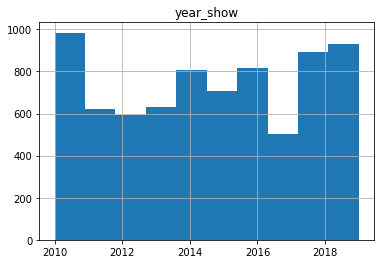

In [71]:
data_full.hist('year_show', bins = 10)

In [72]:
1 - (data_full['box_office'].isna().sum() / data_full['box_office'].shape[0])

0.42196686264029926

42% фильмов имеют данные по сборам

In [73]:
#доля прокатных фильмов
part_box_office = data_full.pivot_table(index = 'year_show', values = ['box_office', 'title'], aggfunc = 'count')
part_box_office

,box_office,title
year_show,,
2010,105,984
2011,109,622
2012,128,593
2013,184,630
2014,279,806
2015,465,705
2016,526,818
2017,357,505
2018,475,891


<AxesSubplot:xlabel='year_show'>

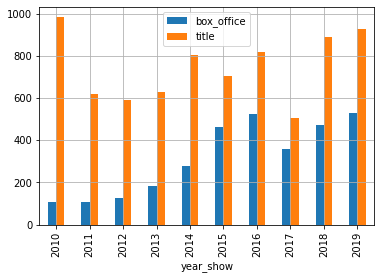

In [74]:
data_full.pivot_table(index = 'year_show', values = ['box_office', 'title'], aggfunc = 'count').plot(kind = 'bar', grid = True)

<AxesSubplot:xlabel='year_show'>

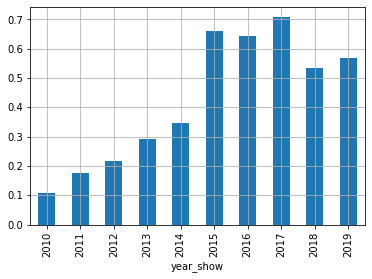

In [75]:
#доля прокатных фильмов
part_box_office['part'] = part_box_office['box_office'] / part_box_office['title']
part_box_office['part'].plot(kind = 'bar', grid = True)

ВЫВОДЫ:
1. Максимальное количество проката, судя по количеству выданных прокатных удостоверений, было в 2010 году, затем до 2012 года был спад. Минимальное количество проката было в 2017 году, и затем резкое увеличение в 2018 и 2019 годах.
2. Доля фильмов с указанной информацией о прокате в кинотеатрах составляет 42 %.
3. Доля прокатных фильмов постепенно растет в 2010 по 2014 годах, затем с 2015 по 2017 годах рост практически в 2 раза по сравнению с 2014 годом. В 2018 - 2019 годах небольшой спад.
4. Судя по всему наиболее полно представлен период с 2015 по 2019 годы.

**Изучим, как менялась динамика проката по годам. Выясним в каком году сумма сборов была минимальной и максимальной.**

In [82]:
#смотрим на прокат с точки зрения сборов
data_full.pivot_table(index = 'year_show', values = 'box_office', aggfunc = 'sum')

,box_office
year_show,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


<AxesSubplot:xlabel='year_show'>

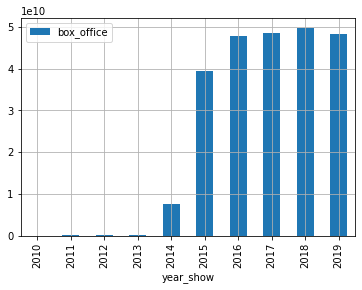

In [83]:
#сумма сборов в прокате по годам
data_full.pivot_table(index = 'year_show', values = 'box_office', aggfunc = 'sum').plot(kind = 'bar', grid = True)

ВЫВОДЫ:
1. С каждым годом был рост сборов, а с 2014 года пошел взрывной рост.
2. Минимальные сборы были в 2010 году, а максимальные в 2018.

**С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.**

In [84]:
data_full.pivot_table(index = 'year_show', values = 'box_office', aggfunc = ['mean', 'median'])

,mean,median
,box_office,box_office
year_show,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


<AxesSubplot:xlabel='year_show'>

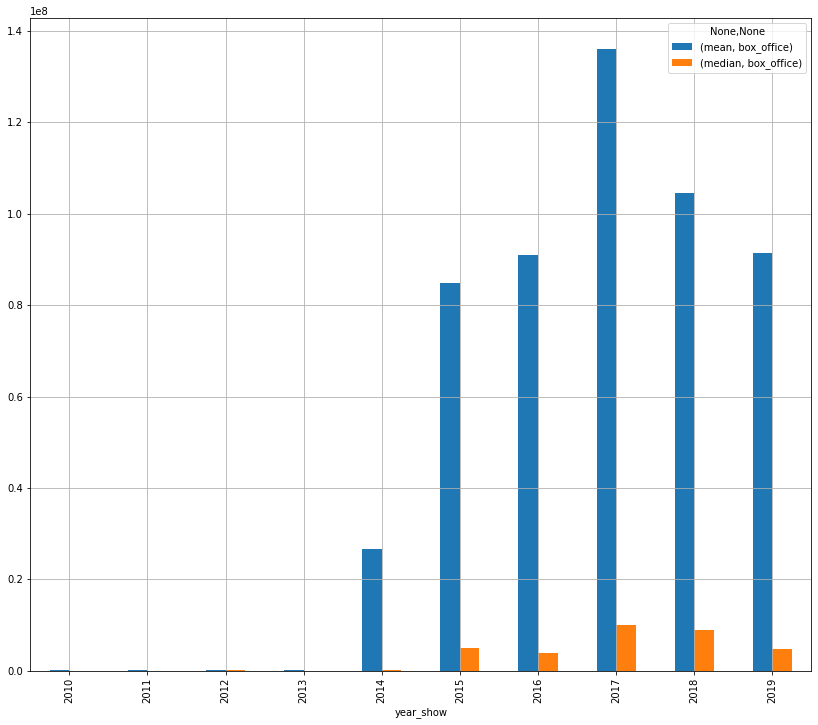

In [85]:
data_full.pivot_table(index = 'year_show', values = 'box_office', aggfunc = ['mean', 'median']).plot(kind = 'bar', figsize = (14, 12), grid = True)

В основной своей массе сборы были маленькие, но есть фильмы, которые имеют сборы в разы превышающие все остальные. За счет них в среднем получается неплохая картина.

**Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.**

In [86]:
#данные с 2015 года
data_year = data_full.loc[data_full['year_show'] >= 2015]

<AxesSubplot:xlabel='year_show'>

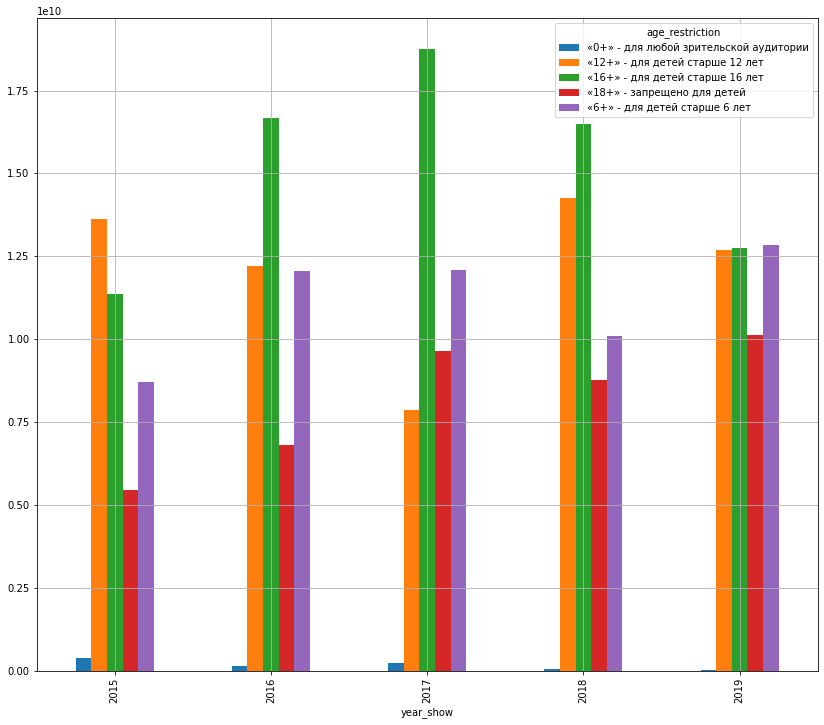

In [87]:
data_year.pivot_table(index = 'year_show', columns = 'age_restriction', values = 'box_office', aggfunc = 'sum').plot(kind = 'bar', figsize = (14, 12), grid = True)

In [88]:
data_year.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum').sort_values(by = 'box_office')

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,8.090774e+08
«18+» - запрещено для детей,4.075962e+10
«6+» - для детей старше 6 лет,5.579861e+10
«12+» - для детей старше 12 лет,6.061945e+10
«16+» - для детей старше 16 лет,7.603473e+10


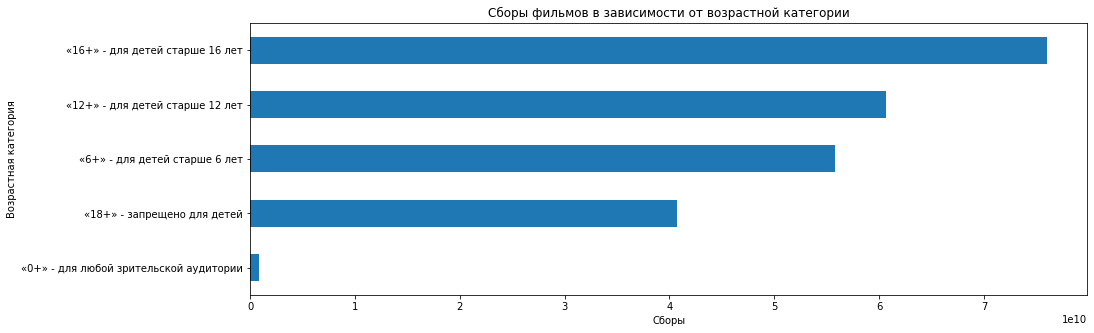

In [90]:
data_full.query('2015 <= year_show <= 2019').groupby('age_restriction')['box_office'].sum()\
  .sort_values()\
  .plot(kind = 'barh', title = 'Сборы фильмов в зависимости от возрастной категории'\
        , figsize = (15,5))

plt.ylabel('Возрастная категория')
plt.xlabel('Сборы')
plt.show()

<AxesSubplot:xlabel='genre'>

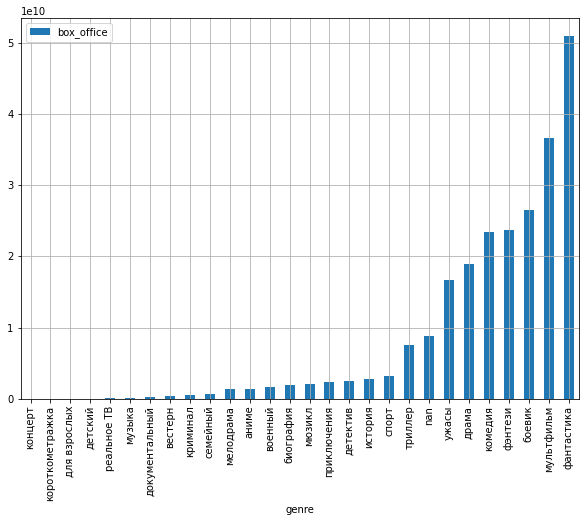

In [91]:
data_year.pivot_table(index = 'genre', values = 'box_office', aggfunc = 'sum').sort_values(by = 'box_office').plot(kind = 'bar', figsize = (10, 7), grid = True)


ВЫВОДЫ:
1. Ограничение по возрасту определенно влияет на сборы;
2. Самые большие сборы были у группы "16+", а меньше всего собрали "0+";
3. По годам картина меняется, но в больштнстве случаев все равно лидирует "16+". Видимо это связано с тем, что самые кассовые фильмы выходят в этой категории. 
4. Тройка лидеров жанров по кассовым сборам - фантастика, мультфильмы и боевики.

### Исследуем фильмы, которые получили государственную поддержку

In [92]:
budget_data = data_full.loc[data_full['budget'] > 0]

In [93]:
#создадим дополнительный столбец с общей суммой государственной поддержки
budget_data['gos_support'] = budget_data['refundable_support'] + budget_data['nonrefundable_support']
budget_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,general_director,genre,gos_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,6.6,NaN,28140.0,2014,А.Якимчук,nan,26000000.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,25000000.0


In [94]:
budget_data['budget'].corr(budget_data['gos_support'])

0.7504478089620624

In [95]:
budget_data['gos_support'].corr(budget_data['box_office'])

0.4889759317766004

In [96]:
budget_data['gos_support'].describe()

count    3.320000e+02
mean     6.084545e+07
std      7.275546e+07
min      3.000000e+06
25%      2.533375e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: gos_support, dtype: float64

<AxesSubplot:xlabel='year_show'>

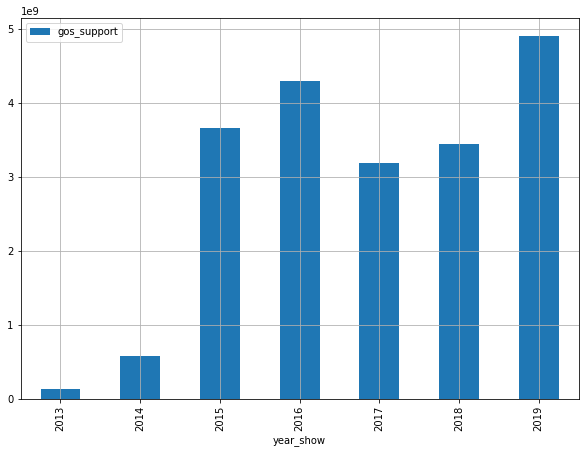

In [97]:
#распределение господдержки по годам
budget_data.pivot_table(index = 'year_show', values = 'gos_support', aggfunc = 'sum').plot(kind = 'bar', figsize = (10, 7), grid = True)

<AxesSubplot:xlabel='year_show'>

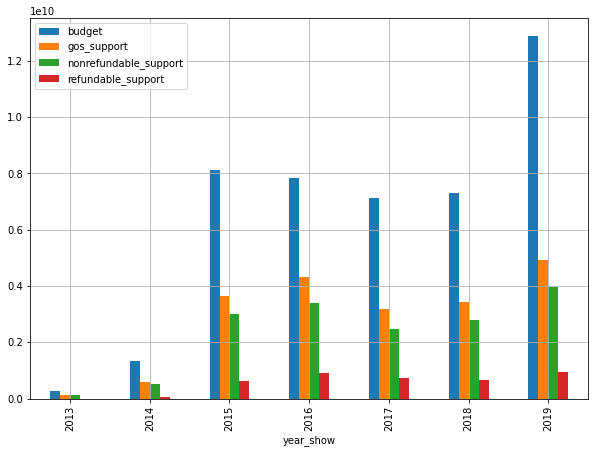

In [98]:
# распределение средств гос. поддержки в общем бюджете
budget_data.pivot_table(index = 'year_show', values = ['gos_support', 'refundable_support', 'nonrefundable_support', 'budget'], aggfunc = 'sum').plot(kind = 'bar', figsize = (10, 7), grid = True)

<AxesSubplot:xlabel='year_show'>

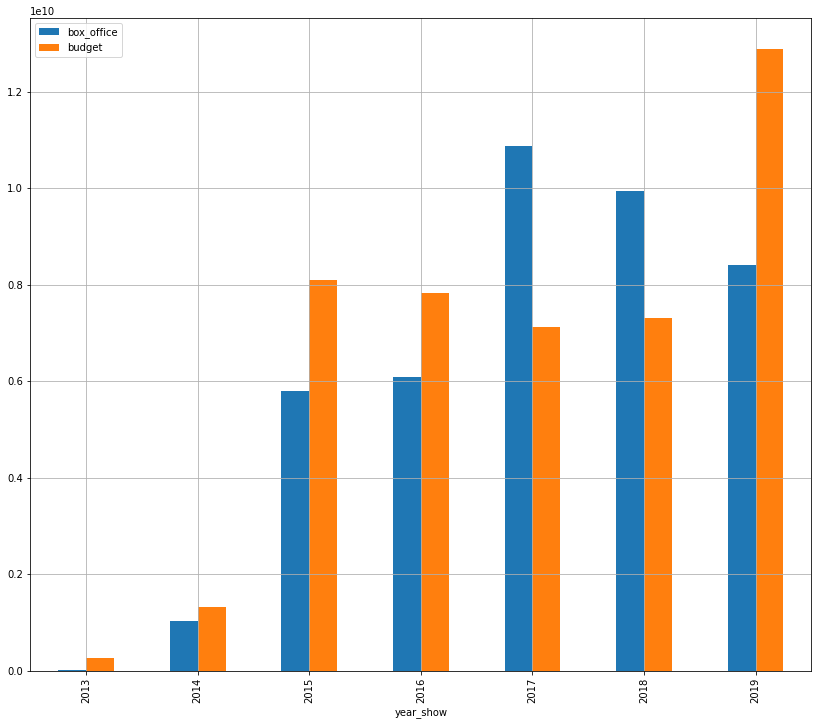

In [99]:
# окупаемость
budget_data.pivot_table(index = 'year_show', values = ['box_office', 'budget'], aggfunc = 'sum').plot(kind = 'bar', figsize = (14, 12), grid = True)

In [100]:
# рейтинги
budget_data['ratings'].describe()

count    332.000000
mean       6.033133
std        1.101380
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

<AxesSubplot:xlabel='year_show'>

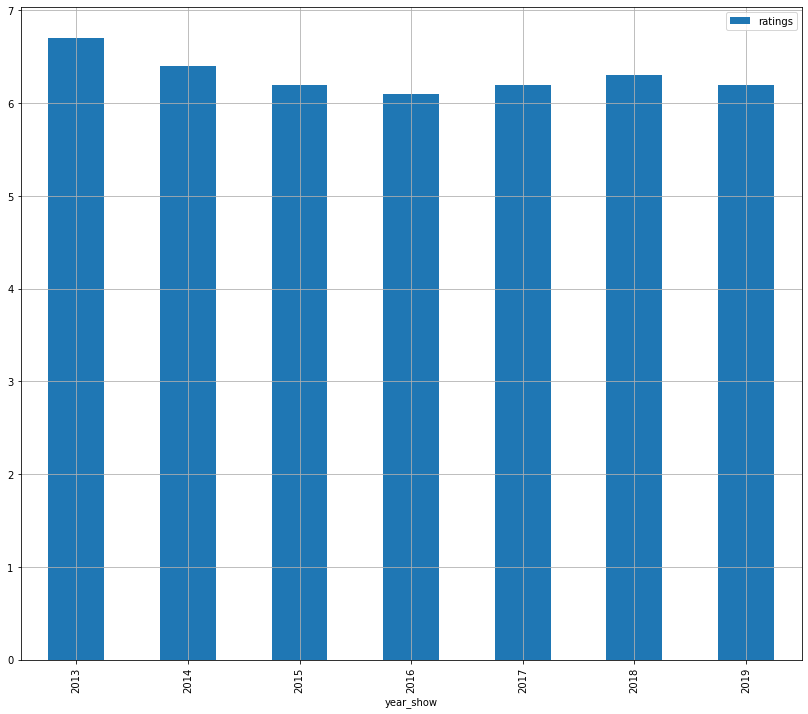

In [101]:
budget_data.pivot_table(index = 'year_show', values = 'ratings', aggfunc = 'median').plot(kind = 'bar', figsize = (14, 12), grid = True)

<AxesSubplot:xlabel='genre'>

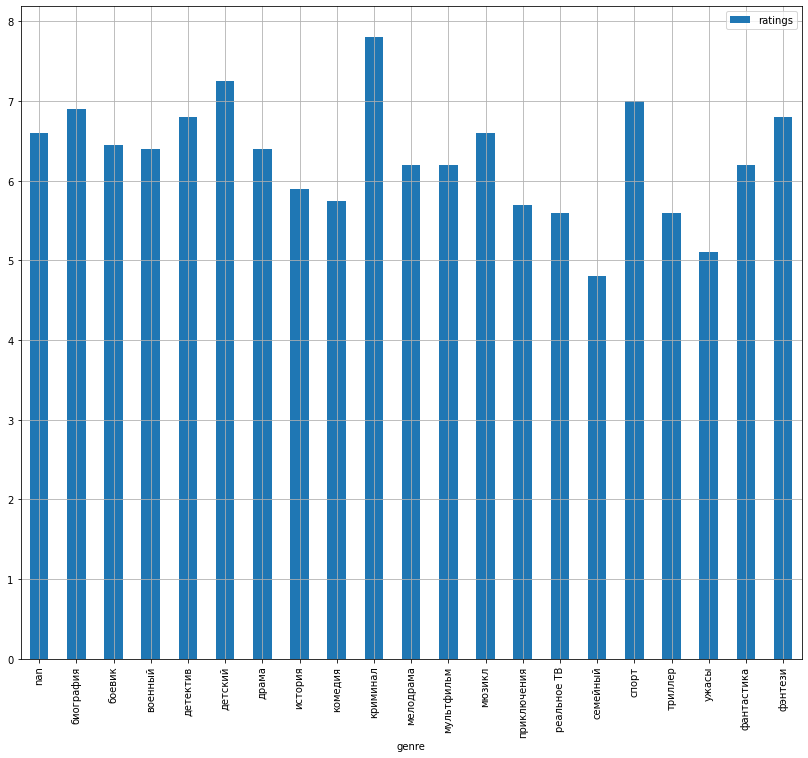

In [102]:
# жанры с самыми высокими рейтингами
budget_data.pivot_table(index = 'genre', values = 'ratings', aggfunc = 'median').plot(kind = 'bar', figsize = (14, 12), grid = True)

<AxesSubplot:xlabel='genre'>

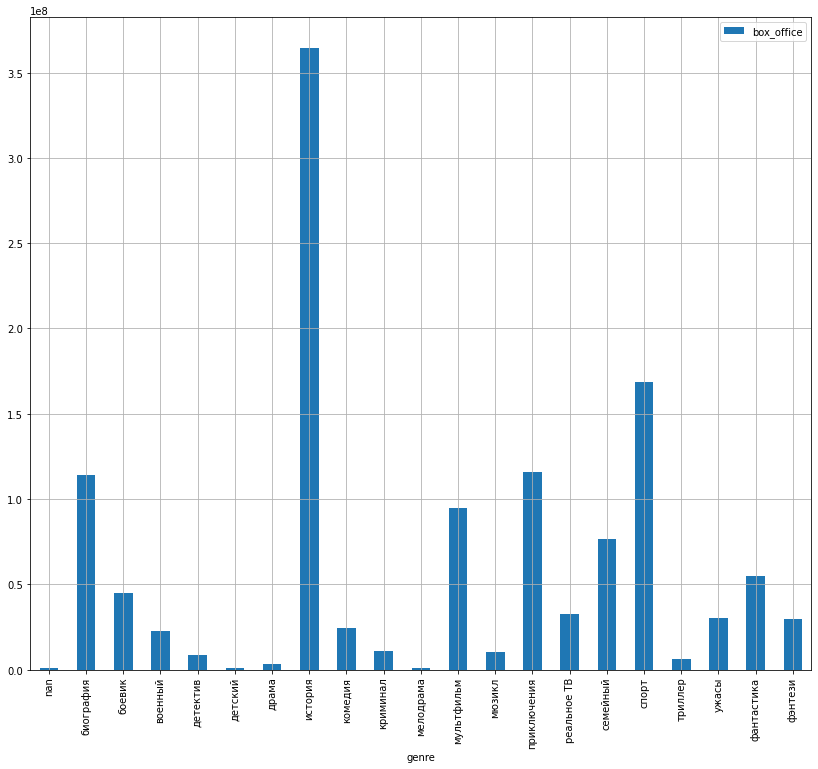

In [103]:
# наиболее кассовые жанры
budget_data.pivot_table(index = 'genre', values = 'box_office', aggfunc = 'median').plot(kind = 'bar', figsize = (14, 12), grid = True)

<AxesSubplot:xlabel='genre'>

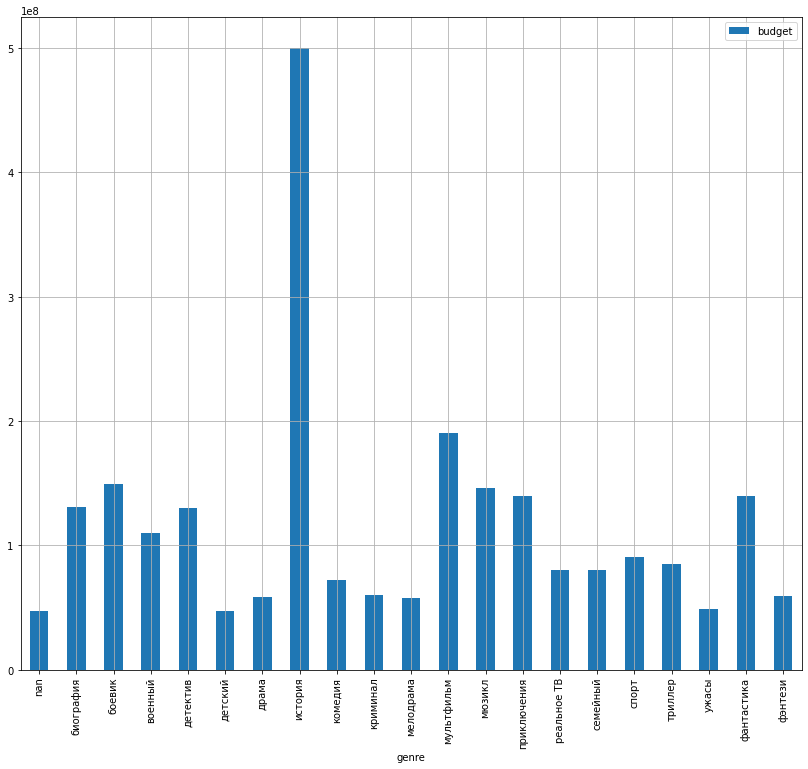

In [104]:
# самые высокобюджетные жанры
budget_data.pivot_table(index = 'genre', values = 'budget', aggfunc = 'median').plot(kind = 'bar', figsize = (14, 12), grid = True)

<AxesSubplot:xlabel='age_restriction'>

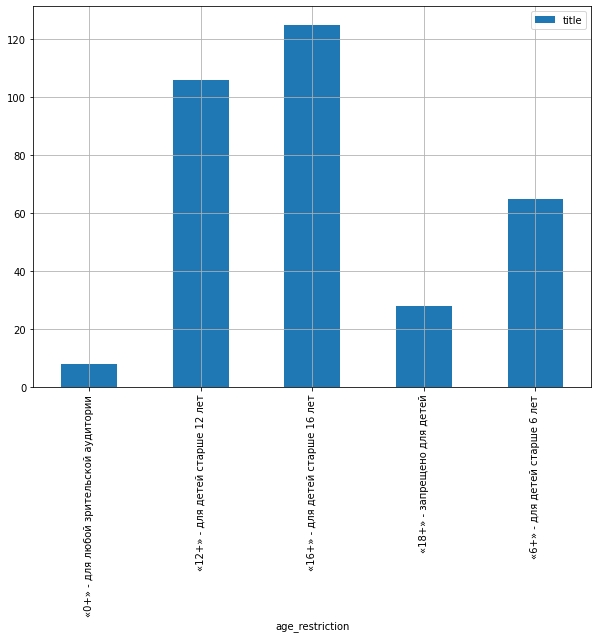

In [105]:
#количество фильмов по возрастным ограничениям
budget_data.pivot_table(index = 'age_restriction', values = 'title', aggfunc = 'count').plot(kind = 'bar', figsize = (10, 7), grid = True)

<AxesSubplot:xlabel='age_restriction'>

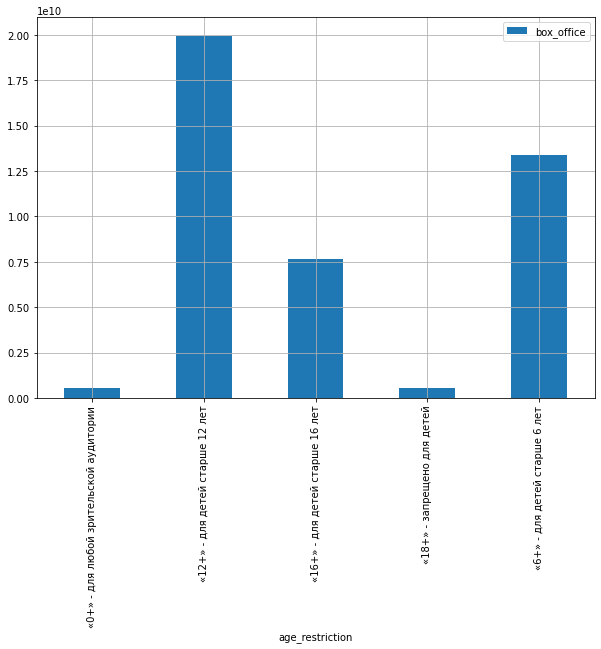

In [106]:
budget_data.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum').plot(kind = 'bar', figsize = (10, 7), grid = True)

ВЫВОДЫ:
1. Есть значительная корреляция между бюджетом и объемом гос. поддержки, коэффициент Пирсона равен 0,75;
2. Так же прослеживается зависимость кассовых сборов от величины гос. поддержки. Коэффициент Пирсона равен 0,45;
3. На окупаемость выходили дважды - в 2017 и 2018 годах;
4. Судя по средним показателям рейтингов по годам - стабильно чуть больше 6-ти;
5. Тройка лидеров жанров по рейтингам - криминал, детский, спорт;
6. Наиболее касовыми жанрами являются исторические и спортивные фильмы;
7. Самые большие бюджеты у исторических жанров.

## Общий вывод

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. На насколько фильмы, которые снимаются с государственной поддержкой интересны зрителю.

ОБЩИЙ ВЫВОД:
1. Исходя из общих данных основной популярностью, в виде кассовых сборов, пользуются фильмы о фантастике, мультфильмы и боевики с возрастным ограничением "16+". Далее немного уступают лидеру картины с ограничениями "12+" и "6+". 
2. Фильмы для взрослых "18+" по сборам уступают почти в 2 раза лидеру.
3. Фильмы без ограничений по возрасту практически не приносят прибыли.



ВЫВОДЫ ПО ФИЛЬМАМ С ГОСПОДДЕРЖКОЙ:
1.Нельзя сказать, что эти фильмы очень интересны по таким показателям, как рейтинги (в среднем немного больше 6-ти) и окупаемости. Окупаемость была только на протяжении 2-х лет - 2017 и 2018;
2. Наибольшей популярностью пользуются исторические и спортивные ленты;
3. Если посмотреть на количество снятых фильмов, по возрастным ограничениям все в тренде, а вот по сборам лидируют картины "12+", а самые популярные в общей массе "16+" тут на 3-м месте.